In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
#DATA VISULATION
# count each target variable
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<AxesSubplot:xlabel='quality', ylabel='count'>

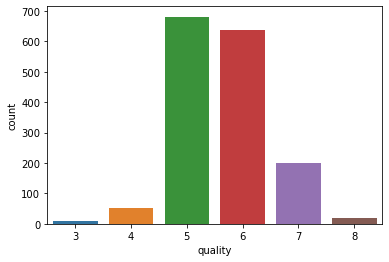

In [10]:
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

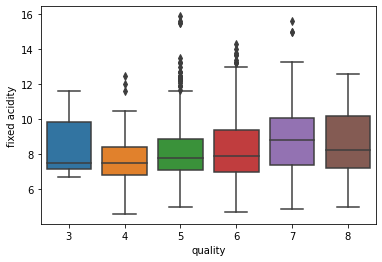

In [11]:
# plot a boxplot to check outliers
sns.boxplot(x='quality', y='fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

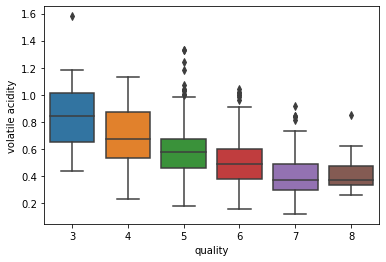

In [12]:
sns.boxplot(x='quality', y='volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

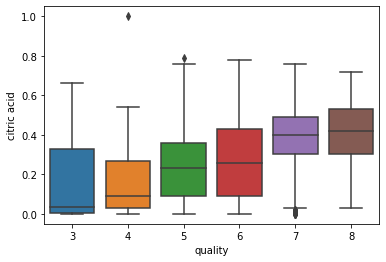

In [13]:
sns.boxplot(x='quality', y='citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

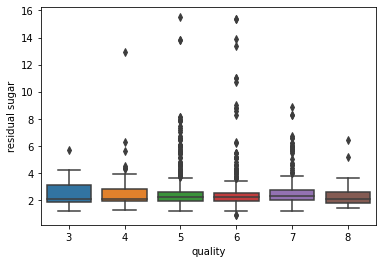

In [14]:
sns.boxplot(x='quality', y='residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

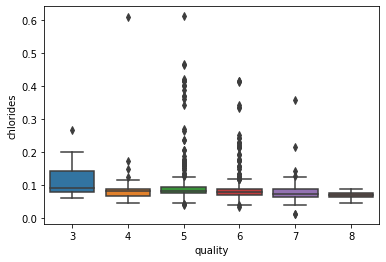

In [15]:
sns.boxplot(x='quality', y='chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

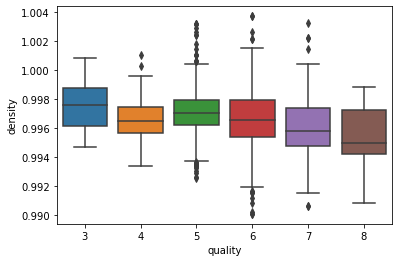

In [16]:
sns.boxplot(x='quality', y='density', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

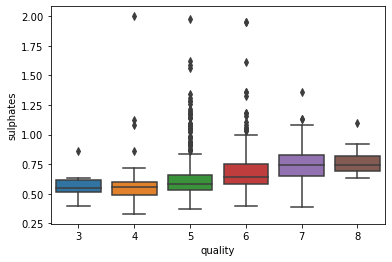

In [17]:
sns.boxplot(x='quality', y='sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

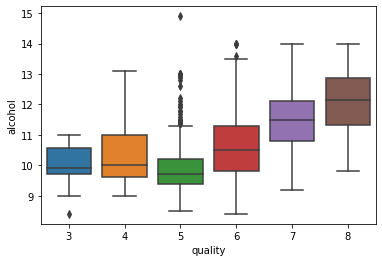

In [18]:
sns.boxplot(x='quality', y='alcohol', data = df)

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

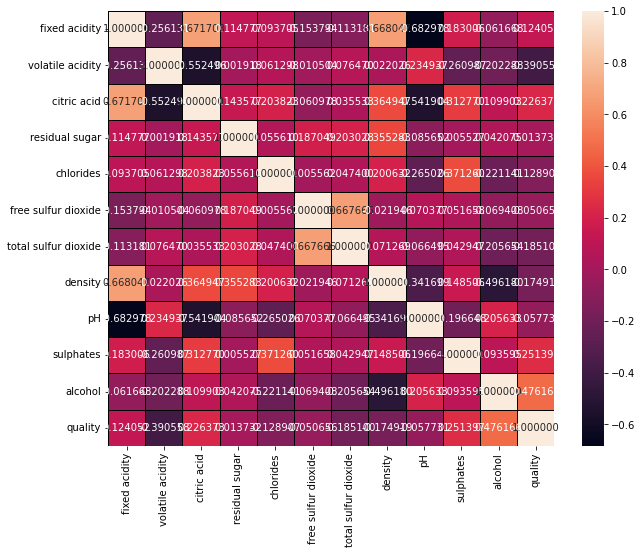

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='2f')

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [24]:
df['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [25]:
Counter(df['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [26]:
x=df.iloc[:,:11]
y=df['Reviews']   

In [27]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [28]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [30]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [31]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

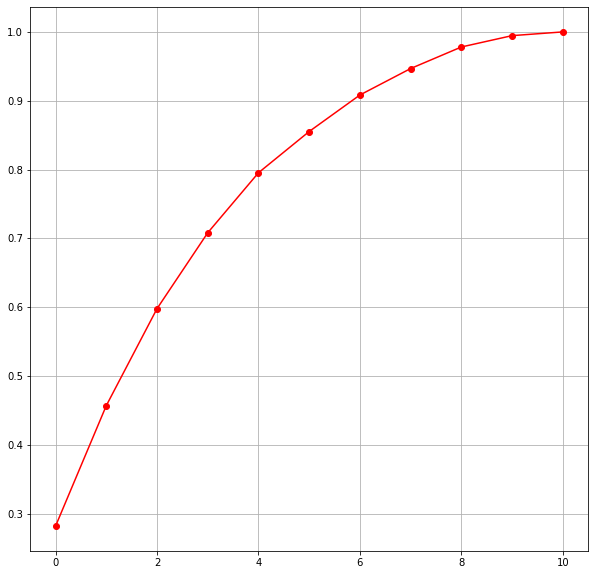

In [32]:
import numpy as np
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [33]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [34]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [35]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [40]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.78      0.74       130
           6       0.61      0.67      0.64       132
           7       0.61      0.40      0.49        42
           8       1.00      0.80      0.89         5

    accuracy                           0.66       320
   macro avg       0.49      0.44      0.46       320
weighted avg       0.63      0.66      0.64       320



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 101  28   1   0]
 [  0   0  35  88   9   0]
 [  0   0   0  25  17   0]
 [  0   0   0   0   1   4]]


In [42]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [43]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00        10
           5       0.58      0.73      0.65       130
           6       0.51      0.33      0.40       132
           7       0.42      0.60      0.50        42
           8       1.00      1.00      1.00         5

    accuracy                           0.53       320
   macro avg       0.59      0.61      0.59       320
weighted avg       0.52      0.53      0.51       320



In [44]:
print(confusion_matrix(y_test, pred_sgd))

[[ 1  0  0  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  5 95 26  4  0]
 [ 0  0 58 44 30  0]
 [ 0  0  4 13 25  0]
 [ 0  0  0  0  0  5]]


In [45]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 0.6927286942924159
Testing accuracy : 0.615625


In [46]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
model_eval.mean()